In [113]:
import numpy as np
from ssa import *
from lds import *
import matplotlib.pyplot as plt

In [114]:
eps = 0.02
target = -0.1

In [115]:
n=32

In [116]:
A = np.random.normal(0, 1.0, size=(n, n))

In [117]:
fAs(A, 0.0)[0:2]

(np.float64(156.1134099098919), np.float64(-1236.7312351512944))

In [118]:
s_absc = np.max([np.real(eig) for eig in np.linalg.eigvals(A)])
s_absc

np.float64(4.505066783861075)

In [119]:
a_e, del_s_a_e = ssa(A, eps, start_at_absc = True, method="newton")

In [120]:
print(f"smoothed spectral abscissa: {a_e}")
print(f"spectral_abscissa: {s_absc}")

smoothed spectral abscissa: 4.647458775861647
spectral_abscissa: 4.505066783861075


In [121]:
orig_A = np.copy(A)
B, s_abscs, ss_abscs = optimize_ssa(A, eps, target, step_size=1.0, iters=50, show_prog=True)

100%|██████████| 50/50 [00:00<00:00, 131.46it/s]


In [122]:
ss_abscs[-1]

np.float64(-0.10000000000000156)

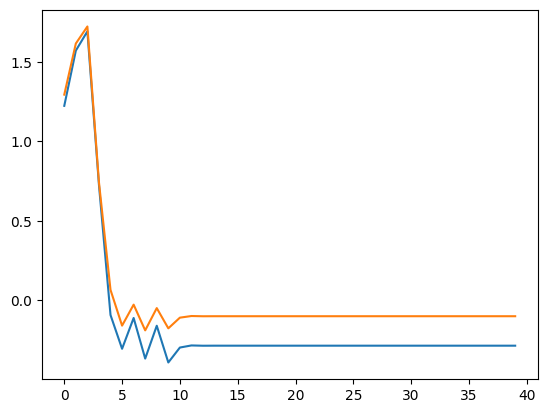

In [123]:
plt.plot(s_abscs[10:50])
plt.plot(ss_abscs[10:50])

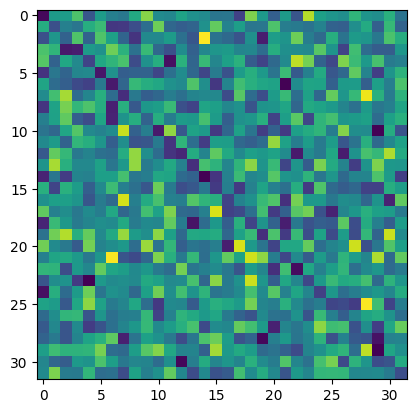

In [124]:
plt.imshow(B)

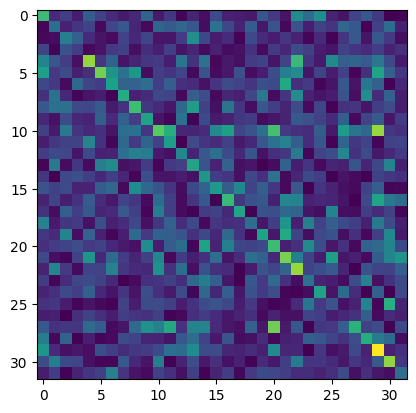

In [125]:
plt.imshow(np.abs(orig_A - B))

In [126]:
def graph_fAs(pr=False):
    xs = np.linspace(a_e - 2.0, a_e + 2.0, num=50)
    ys = np.array([fAs(A, x, False)[0] for x in xs])
    if pr: print(ys)

    plt.plot(xs, ys)
    plt.vlines([s_absc], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="BLACK", linestyles="dashed", label="abscissa")
    plt.vlines([a_e], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="RED", linestyles="dashed", label="a_e")
    plt.show()

In [127]:
C = np.copy(B)

In [128]:
C = mutate(C, eps, target, step_size=0.01)
ssa(C, eps)[0]

np.float64(-0.1001276229293306)

In [129]:
x_0 = np.zeros(shape=(n,))
x_0[0] = 1.0

In [130]:
B_xs = lds(B, x_0, iters=500, dt=0.003)
C_xs = lds(C, x_0, iters=500, dt=0.003)

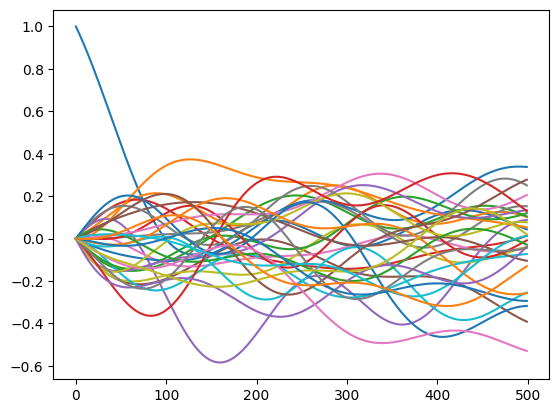

In [131]:
plt.plot(B_xs)
plt.show()

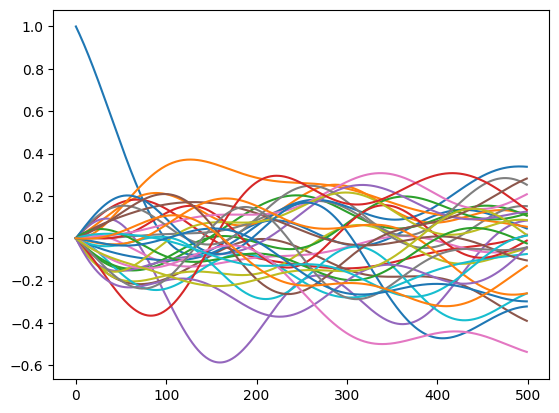

In [132]:
plt.plot(C_xs)
plt.show()

0.01712848166402603
0.31983603756167567


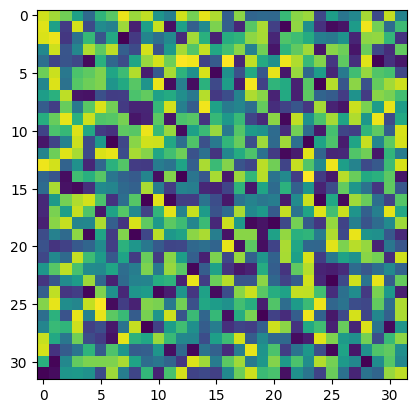

In [133]:
print(np.max(np.abs(C-B)))
print(np.sqrt(np.sum(np.power(C - B, 2.0))))
plt.imshow(np.abs(C - B))

(array([ 28.,  45., 101., 154., 228., 201., 146.,  78.,  30.,  13.]),
 array([-3.12438725, -2.48391773, -1.8434482 , -1.20297867, -0.56250915,
         0.07796038,  0.71842991,  1.35889943,  1.99936896,  2.63983849,
         3.28030801]),
 <BarContainer object of 10 artists>)

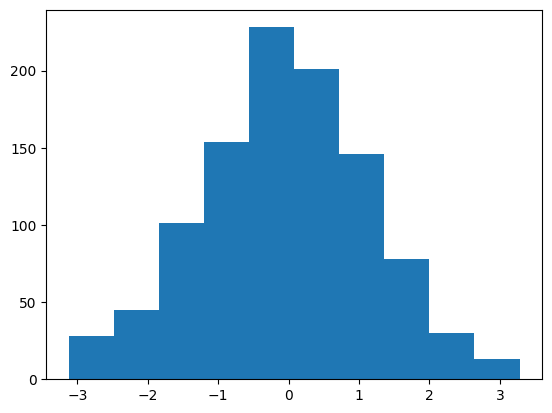

In [134]:
plt.hist(np.ravel(C))

In [135]:
D = np.copy(B)
xs, tangent_thetas, abscs, s_abscs, s_norms, F_norms = linear_hebbian_stable(D, x_0, eps, target, iters=500, beta=0.0, dA=0.02)

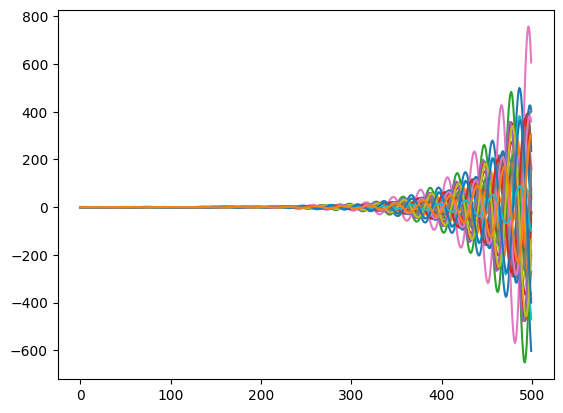

In [ ]:
plt.plot(xs)
plt.show()

In [ ]:
D_xs = lds(D, x_0, iters=500, dt=0.01)

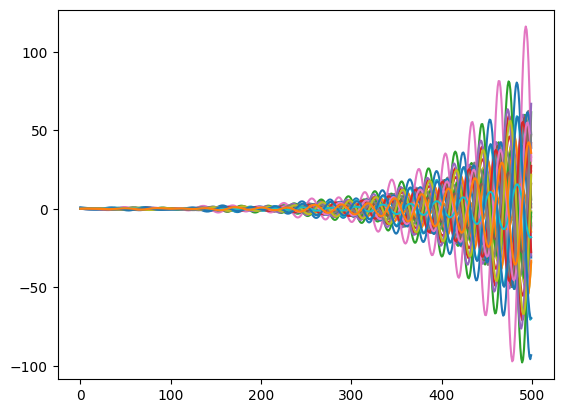

In [ ]:
plt.plot(D_xs)
plt.show()

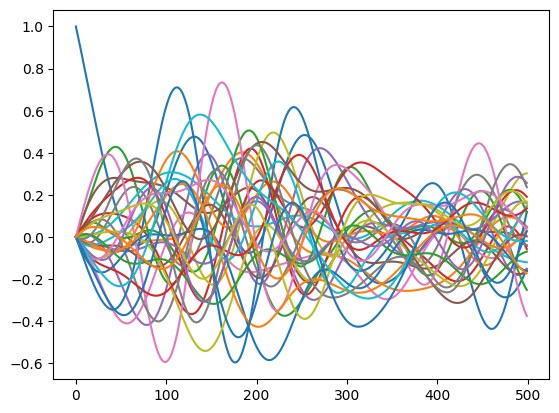

In [ ]:
plt.plot(B_xs)
plt.show()

0.0
0.0


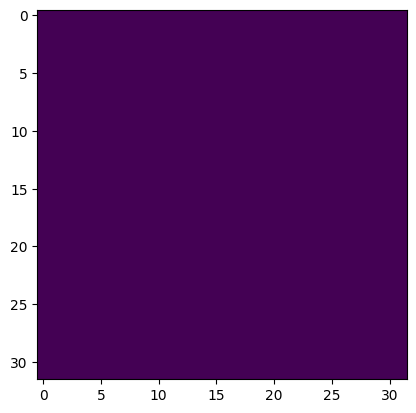

In [ ]:
print(np.max(np.abs(D-B)))
print(np.sqrt(np.sum(np.power(D - B, 2.0))))
plt.imshow(np.abs(D - B))